# Simulação de Lançamento

Estudando eventos físicos do lançamento de um projétil.

## Introdução

Podemos endender o lançamento de um projétil como qualquer movimento não vertical, que está sujeito às ações de algumas forças naturais, tal como a própria **gravidade**.

Neste caso, temos a resistencia do ar sendo considerada desprezível, e então não entrará em equação.

O movimento será tratado em duas dimenções, então podemos representálo em um plano cartesiano.

## Projeto

Considerando as informações que discutimos em sala de aula nos dias 25/08/2022 e 01/09/2022, montem uma simulação capaz de descrever o lançamento balistico de um projetil de velocidade inicial $v_0$ e ângulo de lançamento theta ($\theta$).

Os dados de saida devem ser apresentados numa tabela com as colunas de tempo, posição $X$, posição $Y$, componente  horizontal da velocidade $v_x$, componente vertical da velocidade $v_y$, velocidade total $v_t$ e ângulo da velocidade alpha.

## Código

In [103]:
import math
import numpy as np
import matplotlib.pyplot as plt

A partícula sendo lançada com uma angulação menor que $90^{\circ}$, apresentará uma trajetória não vertical em relação ao solo, analogamente, caso o angulo de lançamento seja de $0^{\circ}$ podemos designa-lo como um lançamento horigontal.

A trajetória acontece com a associação de dois movimentos:
- O componente horizontal de movimento;
- O componente vertical de movimento.

Teremos o componente horizontal como um movimento retilíneo e uniforme, e o componendo vertical como um movimento uniformemente variádo, pois está sujeito às ações da gravidade.

O corpo é lançado com velocidade inicial $v_i$. Podemos decompor o vetor da velocidade em dois componentes $v_x$ e $v_y$ que são **perpendiculares** entre sí. A partir da velocidade inicial, podemos usar propriedades do triângulo retângulo para descobrir seus catetos (velocidade nos eixos $x$ e $y$), tal que:

$$
v_x = v_i \cdot cos\theta
$$

In [104]:
def Vx(ang=0, vi=0.0):
    a = math.radians(ang)
    return vi * math.cos(a)

Analogamente com o eixo $y$, porém a componente vertical está sujeita às ações da aceleração da gravidade $g$ com projeção negativas ($-g$). O componente varia com o tempo, de forma que:

$$
v_y = v_i \cdot sin \theta - gt
$$

In [105]:
def Vy(ang=0, vi=0.0, g=9.81, t=0.0, var=True):
    a = math.radians(ang)
    v = vi * math.sin(a)
    if var:
        return v - g*t
    else:
        return v

No eixo da abscissas ($x$) qualquer influência gravitacional é $nula$, portanto o movimento é retilíneo e uniforme. Esse espaço percorrido pela partícula no eixo $x$ (interpretação atual da variação) irá variar em relação eo tempo de observação, de forma crescente e cosntante.

$$
x(t) = x_i + v_x \cdot t
$$

In [106]:
def Px(xi=0.0, vx=0.0, t=0.0):
    return xi + vx * t

Já o eixo das ordenadas ($y$) a projeção da gavidade $g$ se torna $-g$, e também varia em relação à variação total do tempo.

$$
y(t) = y_i + v_y \cdot t - \frac{gt^{2}}{2}
$$

In [107]:
def Py(yi=0.0, vy=0.0, g=9.81, t=0.0):
    #print(yi, vy, g, t)
    return yi + (vy * t) - ((g * (t**2))/2)

Tendo o valor da velocidade em ambos os eixos podemos usar o Teorema de Pitágoras para descobrira o valor da velocidade total, em sua forma vetorial.

$$
v_t = \sqrt{v_x^{2}+v_y^{2}}
$$

In [108]:
def Vt(vx=0.0, vy=0.0):
    s = (vx**2) + (vy**2)
    return math.sqrt(s)

É possivel descobrir o ângulo instantâneo do prejétil em seu curso, aplicando o $arco\ tangente$ na diferênça da velocidade nos eixos:

$$
\theta = arc tg \frac{v_y}{v_x}
$$

In [109]:
def Ang(vx=0.0, vy=0.0):
    return math.atan(vy/vx)

Variáveis que serão baseadas para descrever as propriedades do movimento da particola.

In [110]:
ang = 70 # Angulo de lançamento
vi  = 13 # Velocidade inicial

init = 0.0
end  = 3.0
# end  = 2.8301

Tabela com alguns valores intermediários que descrevem o movimento.

In [111]:
print("   Time       X       Y      Vx      Vy  VTotal     Ang")
print("----------------------------------------------------------")
for i in np.linspace(init, end,dtype=float, num=10):
    vx = Vx(ang=ang,vi=vi)
    vy = Vy(ang=ang,vi=vi,t=i)
    vt = Vt(vx=vx,vy=vy)

    px = Px(vx=vx,t=i)
    py = Py(vy=Vy(ang=ang,vi=vi,t=i,var=False),t=i)
    ag = Ang(vx=vx, vy=vy)

    print("{t:7.3f} {x:7.3f} {y:7.3f} {vx:7.3f} {vy:7.3f} {vt:7.3f} {a:7.3f}".format(
        t = i,
        x = px,
        y = py,
        vx = vx,
        vy = vy,
        vt = vt,
        a = np.degrees(ag)
    ))

   Time       X       Y      Vx      Vy  VTotal     Ang
----------------------------------------------------------
  0.000   0.000   0.000   4.446  12.216  13.000  70.000
  0.333   1.482   3.527   4.446   8.946   9.990  63.572
  0.667   2.964   5.964   4.446   5.676   7.210  51.927
  1.000   4.446   7.311   4.446   2.406   5.056  28.419
  1.333   5.928   7.568   4.446  -0.864   4.529 -10.997
  1.667   7.410   6.735   4.446  -4.134   6.071 -42.916
  2.000   8.893   4.812   4.446  -7.404   8.636 -59.014
  2.333  10.375   1.799   4.446 -10.674  11.563 -67.386
  2.667  11.857  -2.304   4.446 -13.944  14.636 -72.314
  3.000  13.339  -7.497   4.446 -17.214  17.779 -75.517


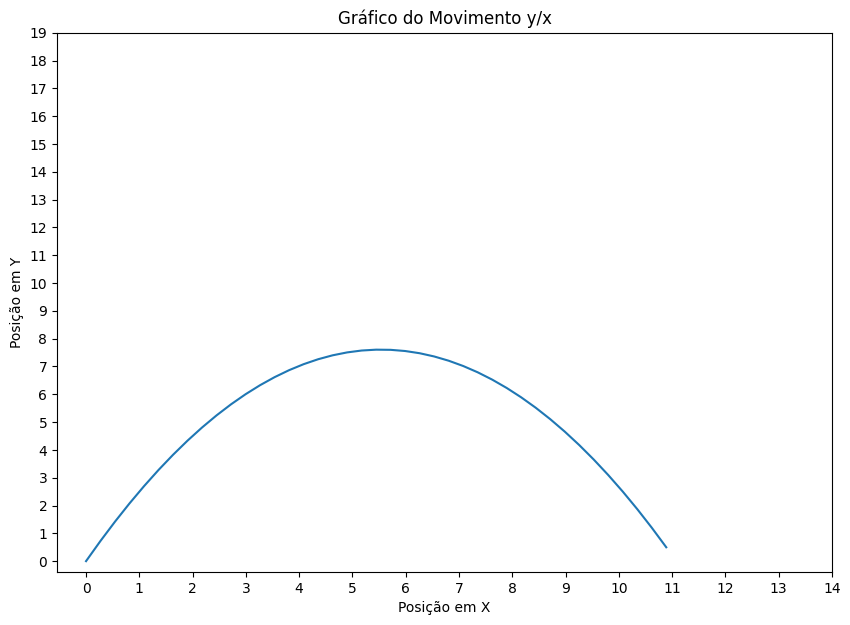

In [112]:
x = np.array([0])
y = np.array([0])
vt = np.array([0])

r = np.linspace(init,end,dtype=float, num=50)
for i in r:
    vx = Vx(ang=ang,vi=vi)
    vy = Vy(ang=ang,vi=vi,t=i)
    px = Px(vx=vx,t=i)
    py = Py(vy=Vy(ang=ang,vi=vi,t=i, var=False),t=i)
    if py < 0:
        break
    x = np.append(x,px)
    y = np.append(y,py)
    vt = np.append(vt,Vt(vx=vx,vy=vy))

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.plot(x,y)
#ax.plot(r,vt)
ax.set_title("Gráfico do Movimento y/x")
ax.set_xlabel("Posição em X")
ax.set_ylabel("Posição em Y")
plt.xticks(range(0, 15))
plt.yticks(range(0, 20, 1))
plt.show()